## Pandas analysis

In the following a series of exercises is proposed on a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGA's. Each measurement (i.e. each raw) consists of the address of the TDC providing the signal, 'FPGA' and 'TDC_Channel, and the timing information itself, 'ORBIT_CNT', 'BX_COUNTER' and 'TDC_MEAS'. Each TDC count correspond 25/30 ns, whereas the BX_COUNTER feauters gets updated every 25 ns and the ORBIT_CNT every 'x' BX_COUNTER. You can see these way of storing the time as similar to hours, minutes and seconds.

1\. Create a Pandas DataFrame by read N raws of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of raws and larger that 10k.

2\. Find out the value of 'x'

3\. Find out how much the data taking lasted. You can either make an estimate on the baseis of the fraction of the measurements (raws) you read, or perform this check precisely by reading out the whole dataset

4\. Create a new column with the actual time in ns (as a combination of the other three columns with timing information)

5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1

6\. Create a new DataFrame with only the raws with HEAD=1

7\. Make two occupancy plots (one per FPGA), i.e. plot the number of counts per TDC channel

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#f=open("C:/Users/victo/Documents/UNIPD/HighLevelProgramming/LaboratoryOfComputationalPhysics/data_000637.txt")
#print(f)
#List=f.readlines()
#print(List[0:100])
data=pd.read_csv("C:/Users/victo/Documents/UNIPD/HighLevelProgramming/LaboratoryOfComputationalPhysics/data_000637.txt")
print(len(data))
print(type(data))



1310720
<class 'pandas.core.frame.DataFrame'>


In [38]:
print(data)
count=data.groupby('ORBIT_CNT').sum()
#print(count)

         HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS
0           1     0          123  3869200167        2374        26
1           1     0          124  3869200167        2374        27
2           1     0           63  3869200167        2553        28
3           1     0           64  3869200167        2558        19
4           1     0           64  3869200167        2760        25
5           1     0           63  3869200167        2762         4
6           1     0           61  3869200167        2772        14
7           1     0          139  3869200167        2776         0
8           1     0           62  3869200167        2774        21
9           1     0           60  3869200167        2788         7
10          1     1            7  3869200167        2785         4
11          1     0           64  3869200167        2786        19
12          1     1            6  3869200167        2792        18
13          1     0           36  3869200167        2791      

In [39]:
#BX_counter is updated every 25ns.
print(len(data))
duration=len(data)*25
print(duration)
print(duration*1e-9, 'seconde')


1310720
32768000
0.032768000000000005 seconde


In [46]:
time=np.linspace(25,32768000,num=1310720)
data["Time"]=time
print(data)

         HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS        Time
0           1     0          123  3869200167        2374        26        25.0
1           1     0          124  3869200167        2374        27        50.0
2           1     0           63  3869200167        2553        28        75.0
3           1     0           64  3869200167        2558        19       100.0
4           1     0           64  3869200167        2760        25       125.0
5           1     0           63  3869200167        2762         4       150.0
6           1     0           61  3869200167        2772        14       175.0
7           1     0          139  3869200167        2776         0       200.0
8           1     0           62  3869200167        2774        21       225.0
9           1     0           60  3869200167        2788         7       250.0
10          1     1            7  3869200167        2785         4       275.0
11          1     0           64  3869200167        

In [49]:
Head=np.random.randint(2, size=1310720 )
data["HEAD"]=Head
print(data)

         HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS        Time
0           0     0          123  3869200167        2374        26        25.0
1           0     0          124  3869200167        2374        27        50.0
2           0     0           63  3869200167        2553        28        75.0
3           0     0           64  3869200167        2558        19       100.0
4           1     0           64  3869200167        2760        25       125.0
5           1     0           63  3869200167        2762         4       150.0
6           0     0           61  3869200167        2772        14       175.0
7           1     0          139  3869200167        2776         0       200.0
8           1     0           62  3869200167        2774        21       225.0
9           0     0           60  3869200167        2788         7       250.0
10          1     1            7  3869200167        2785         4       275.0
11          1     0           64  3869200167        

In [54]:
new=data[data['HEAD']==1]
print(new)

         HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS        Time
4           1     0           64  3869200167        2760        25       125.0
5           1     0           63  3869200167        2762         4       150.0
7           1     0          139  3869200167        2776         0       200.0
8           1     0           62  3869200167        2774        21       225.0
10          1     1            7  3869200167        2785         4       275.0
11          1     0           64  3869200167        2786        19       300.0
12          1     1            6  3869200167        2792        18       325.0
13          1     0           36  3869200167        2791        23       350.0
14          1     0           56  3869200167        2789         3       375.0
15          1     1          139  3869200167        2797         0       400.0
17          1     0           63  3869200167        2790        10       450.0
20          1     1           10  3869200167        

         HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS        Time
10          1     1            7  3869200167        2785         4       275.0
12          1     1            6  3869200167        2792        18       325.0
15          1     1          139  3869200167        2797         0       400.0
20          1     1           10  3869200167        2789        14       525.0
43          1     1            1  3869200168           7        18      1100.0
57          1     1           62  3869200168         263        20      1450.0
58          1     1          127  3869200168         273         6      1475.0
61          1     1            7  3869200168         277         4      1550.0
63          1     1            8  3869200168         282        17      1600.0
72          1     1            4  3869200168        1089        23      1825.0
74          1     1            7  3869200168        1101         3      1875.0
75          1     1            3  3869200168        

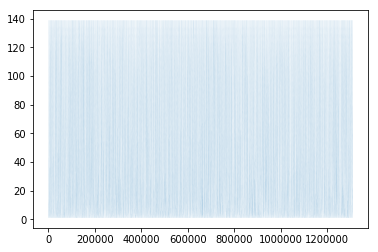

In [71]:
tsone=new[new['FPGA']==1]
tszero=new[new['FPGA']==0]
plt.figure
plt.plot(tsone['TDC_CHANNEL'],linewidth=0.01)

In [72]:
group=new.groupby('TDC_CHANNEL').sum()
print(group)

              HEAD   FPGA        ORBIT_CNT  BX_COUNTER  TDC_MEAS          Time
TDC_CHANNEL                                                                   
1            14809  14179   57299074756701    26362073    215043  2.433600e+11
2            17218  16386   66619992938726    30585294    250294  2.841802e+11
3            11682  10924   45200066741682    20691930    169356  1.913769e+11
4            14419  13247   55790084729973    25825891    208335  2.380586e+11
5             8230   7521   31843567168520    14568239    119739  1.355221e+11
6            10278   9312   39767700857950    18380148    150140  1.673642e+11
7             7579   6728   29324713209086    13551864    110016  1.226577e+11
8            10265   8934   39717401122557    18194424    148720  1.669467e+11
9              778     33    3010242342046     1385333     11095  1.254853e+10
10            7640   6524   29560735660651    13706692    110971  1.263949e+11
11            5501   4508   21284503280000     98433